<a href="https://colab.research.google.com/github/phdcoco/Transformer/blob/main/multiple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
dic = {0:'positive', 1:'neutral', 2:'negative'}

eval_list = ["I like apple","I like pear", "I go to school","I dislike mosquito", "I felt very sad", "I feel so good"]

ans = torch.tensor([0, 0, 1, 2, 2, 0])

In [8]:
model.eval()

with torch.no_grad():
  for article in eval_list:
    inputs = tokenizer.encode(article, return_tensors="pt", padding=True, truncation=True)
    outputs = model(inputs)
    logits = outputs.logits
    print(f"{dic[logits.argmax(-1).item()]}:{article}")

positive:I like apple
positive:I like pear
neutral:I go to school
negative:I dislike mosquito
negative:I felt very sad
positive:I feel so good


In [6]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=1e-5)
model.train()

epochs = 50
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()
  inputs = tokenizer.batch_encode_plus(eval_list, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs, labels=ans)

  logits = outputs.logits
  loss = outputs.loss
  loss.backward()

  optimizer.step()
  losses.append(loss)
  print(f"epoch:{epoch+1}, loss:{loss}")

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


epoch:1, loss:1.1998590230941772
epoch:2, loss:1.1486941576004028
epoch:3, loss:1.137811303138733
epoch:4, loss:1.0601229667663574
epoch:5, loss:1.0167018175125122
epoch:6, loss:1.0321178436279297
epoch:7, loss:1.034489631652832
epoch:8, loss:0.9718872904777527
epoch:9, loss:0.9103460907936096
epoch:10, loss:0.8613557815551758
epoch:11, loss:0.9171943068504333
epoch:12, loss:0.8472505211830139
epoch:13, loss:0.8617218136787415
epoch:14, loss:0.872203528881073
epoch:15, loss:0.8252173066139221
epoch:16, loss:0.7058960795402527
epoch:17, loss:0.7934660911560059
epoch:18, loss:0.7086567282676697
epoch:19, loss:0.7804126143455505
epoch:20, loss:0.6781929135322571
epoch:21, loss:0.6310173273086548
epoch:22, loss:0.656063437461853
epoch:23, loss:0.6784734725952148
epoch:24, loss:0.6537191271781921
epoch:25, loss:0.5487697124481201
epoch:26, loss:0.6143286228179932
epoch:27, loss:0.5097731947898865
epoch:28, loss:0.5850074291229248
epoch:29, loss:0.505239725112915
epoch:30, loss:0.48908793926

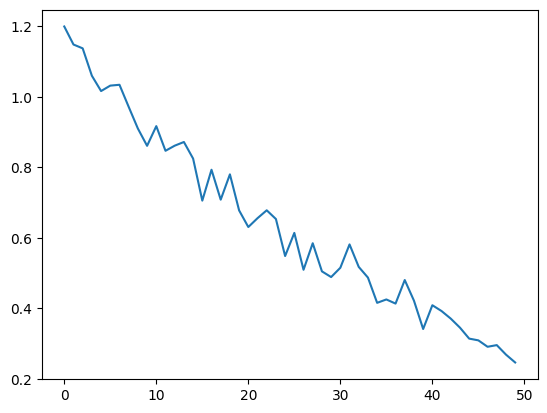

In [7]:
new_losses = [i.item() for i in losses]
import matplotlib.pyplot as plt
plt.plot(new_losses)